# Plot unit conversions

This notebook demonstrates some examples of different kinds of units, and the circumstances under which they are converted and displayed.

In [1]:
%matplotlib inline
import sys
import atomica as at
import matplotlib.pyplot as plt
import numpy as np
import sciris as sc
from IPython.display import display, HTML

In [2]:
testdir = at.parent_dir()
P = at.Project(framework='unit_demo_framework.xlsx',databook='unit_demo_databook.xlsx')
P.load_progbook('unit_demo_progbook.xlsx')
res = P.run_sim('default','default',at.ProgramInstructions(start_year=2018))

Elapsed time for running "default": 0.0103s


Elapsed time for running "default": 0.0222s


This test example has examples of parameters with different timescales, and different types of programs.

##### Parameters

- `recrate` - Duration in months
- `infdeath` - Weekly probability
- `susdeath` - Daily probability
- `foi` - Annual probability

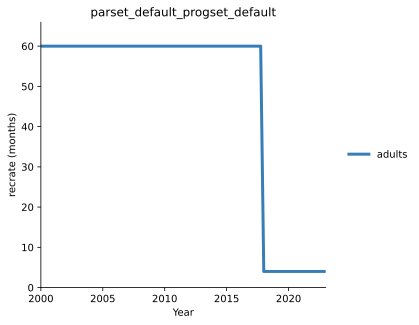

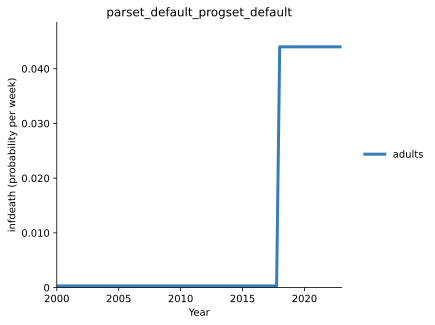

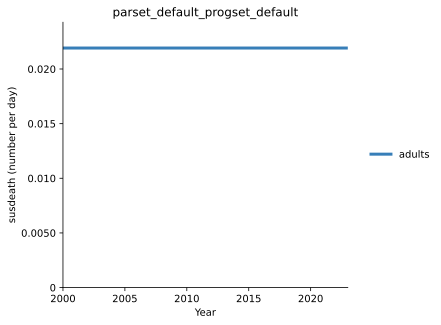

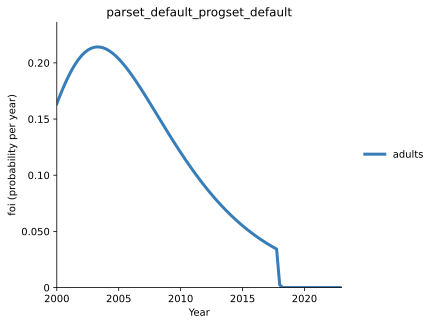

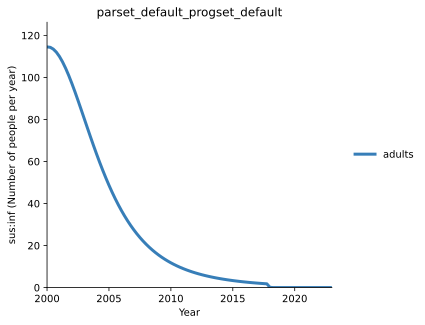

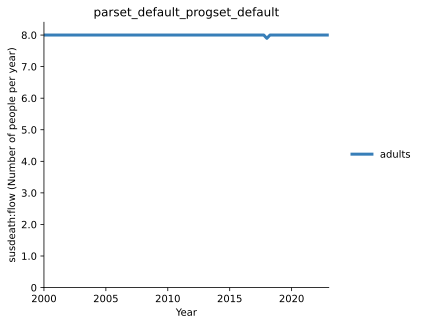

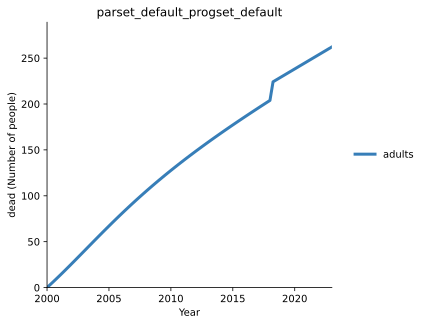

In [3]:
d = at.PlotData(res,outputs=['recrate','infdeath','susdeath','foi','sus:inf','susdeath:flow','dead'],pops='adults')
at.plot_series(d,axis='pops');

Notice that parameters are plotted in their native units. For example, a probability per day is shown as probability per day, matching the numbers that were entered in the databook.

Aggregating these units without specifying the aggregation method will result in either integration or averaging as most appropriate for the units of the underlying quantity:

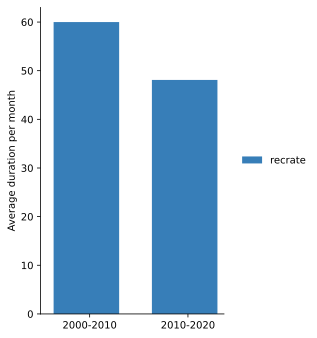

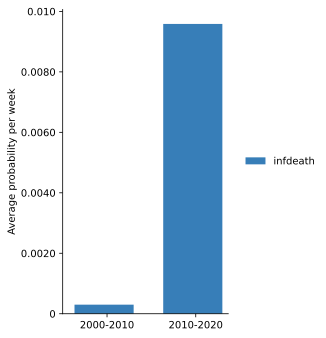

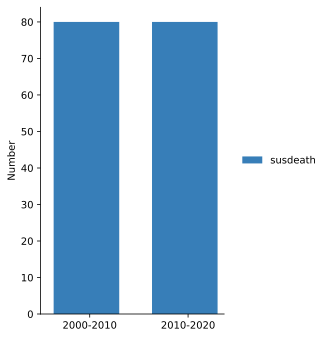

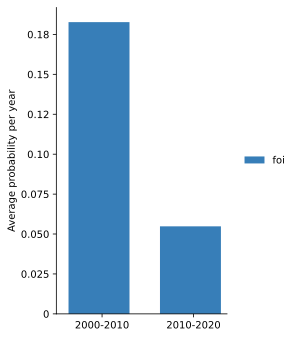

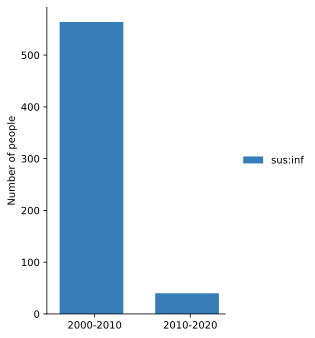

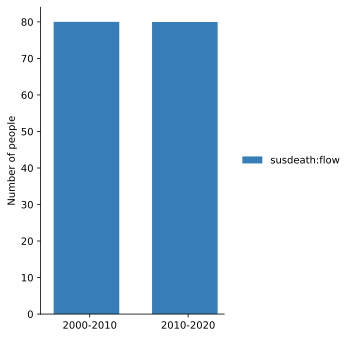

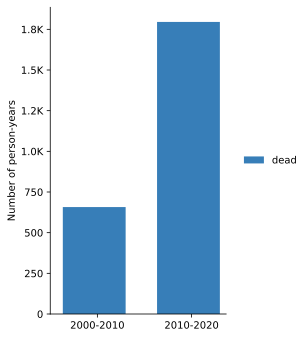

In [4]:
for output in ['recrate','infdeath','susdeath','foi','sus:inf','susdeath:flow','dead']:
    d = at.PlotData(res,outputs=output,pops='adults',t_bins=10)
    at.plot_bars(d);

Accumulation will result in the units and output name being updated appropriately:

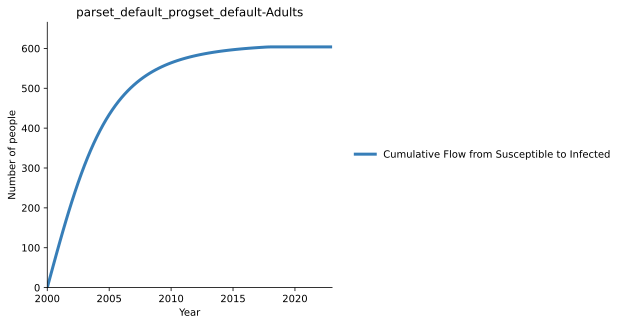

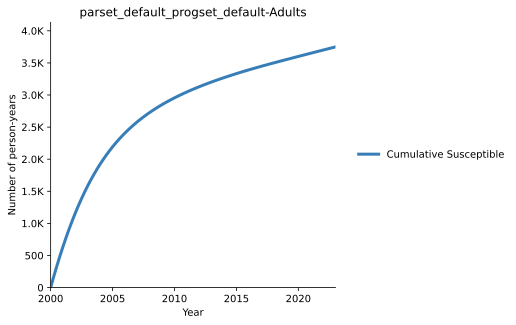

In [5]:
d = at.PlotData(res,outputs='sus:inf',pops='adults',accumulate='integrate',project=P)
at.plot_series(d);
d = at.PlotData(res,outputs='sus',pops='adults',accumulate='integrate',project=P)
at.plot_series(d);

##### Programs

 - `Risk avoidance` - Continuous
 - `Harm reduction 1` - Continuous
 - `Harm reduction 2` - Continuous
 - `Treatment 1` - One-off
 - `Treatment 2` - One-off
 
 Programs with continuous coverage cover a certain number of people every year:

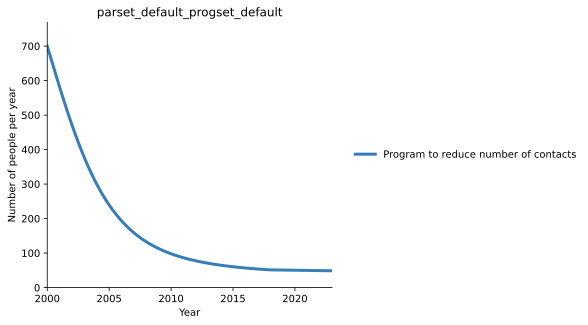

In [6]:
d = at.PlotData.programs(res,outputs='Risk avoidance',quantity='coverage_number')
at.plot_series(d);

Programs with one-off coverage cover a number of people at each time step. This is the number that gets returned by `Result.get_coverage()` but it is automatically annualized for plotting:

In [7]:
annual_coverage = res.model.progset.programs['Treatment 1'].spend_data.vals[0]/res.model.progset.programs['Treatment 1'].unit_cost.vals[0]
timestep_coverage = res.get_coverage('number')['Treatment 1'][0]
print('Annual coverage = %g, Timestep coverage = %g' % (annual_coverage, timestep_coverage))

Annual coverage = 29166.7, Timestep coverage = 1142.86


[<Figure size 614.4x460.8 with 1 Axes>]

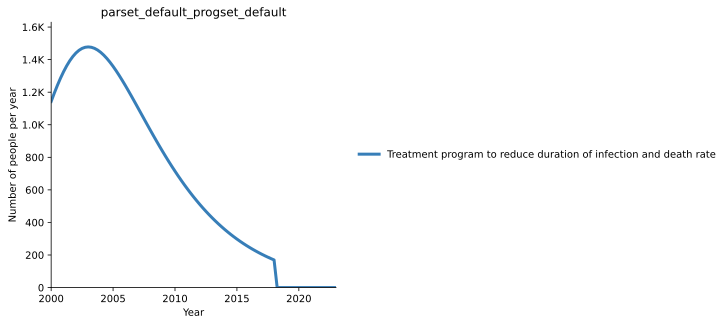

In [8]:
d = at.PlotData.programs(res,outputs='Treatment 1',quantity='coverage_number')
at.plot_series(d)

These units are handled automatically when aggregating. For example, consider computing the number of people covered over a period of time:

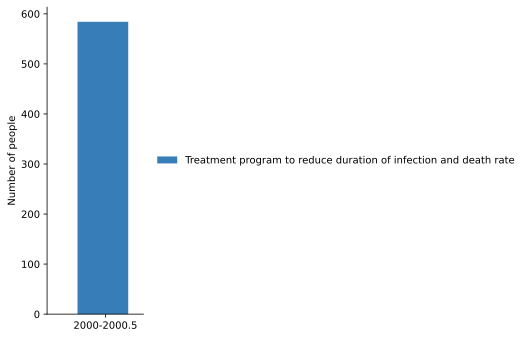

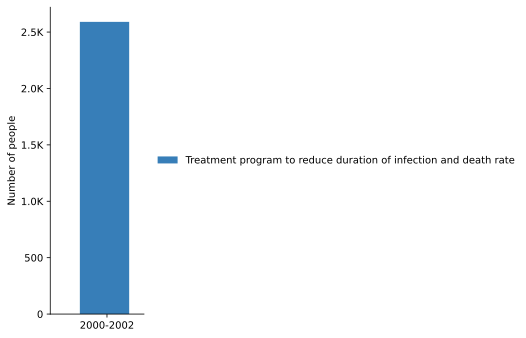

In [9]:
d = at.PlotData.programs(res,outputs='Treatment 1',quantity='coverage_number',t_bins=[2000,2000.5])
at.plot_bars(d);

d = at.PlotData.programs(res,outputs='Treatment 1',quantity='coverage_number',t_bins=[2000,2002])
at.plot_bars(d);

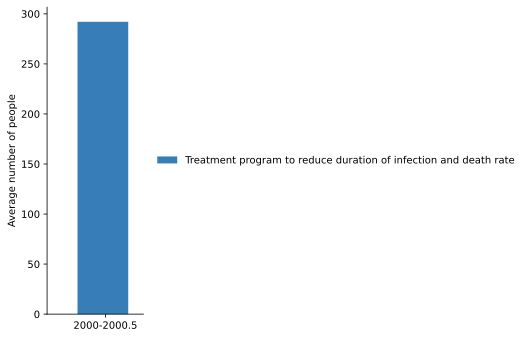

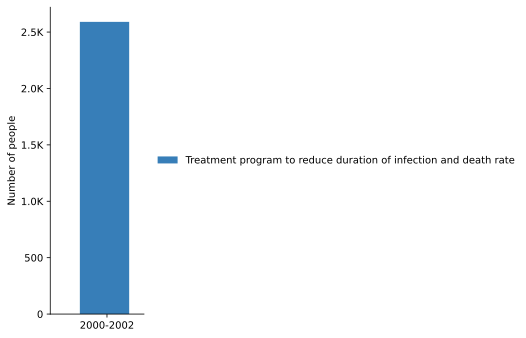

In [10]:
d = at.PlotData.programs(res,outputs='Treatment 1',quantity='coverage_eligible',t_bins=[2000,2000.5])
at.plot_bars(d);

d = at.PlotData.programs(res,outputs='Treatment 1',quantity='coverage_number',t_bins=[2000,2002])
at.plot_bars(d);